# Recommendation System - Part 1

# Product popularity based recommendation system targeted at new customers

# Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("ggplot")
import sklearn
from sklearn.decomposition import TruncatedSVD

# Loading the dataset

In [2]:
amazon_ratings = pd.read_csv("C:\\Users\\dijis\\Downloads\\ratings_beauty.csv")


In [3]:
amazon_ratings = amazon_ratings.dropna()
amazon_ratings.head()

,UserId,ProductId,Rating,Timestamp
0,A39HTATAQ9V7YF,205616461,5,1369699200
1,A3JM6GV9MNOF9X,558925278,3,1355443200
2,A1Z513UWSAAO0F,558925278,5,1404691200
3,A1WMRR494NWEWV,733001998,4,1382572800
4,A3IAAVS479H7M7,737104473,1,1274227200


In [4]:
amazon_ratings.shape

(1048575, 4)

# Finding the most popular products based on the count of ratings



In [5]:
popular_products = pd.DataFrame(amazon_ratings.groupby('ProductId')['Rating'].count())
most_popular = popular_products.sort_values('Rating', ascending=False)
most_popular.head(10)

,Rating
ProductId,
B001MA0QY2,7533
B0009V1YR8,2869
B0000YUXI0,2143
B000ZMBSPE,2041
B003BQ6QXK,1918
B00121UVU0,1838
B000FS05VG,1589
B000142FVW,1558
B001JKTTVQ,1468


# Plotting bar chart of the 30 most popular products



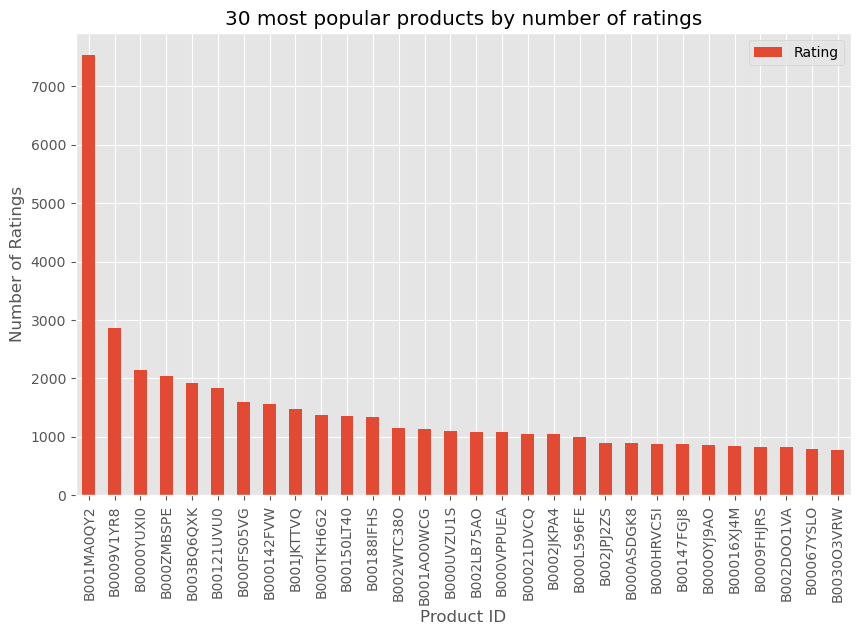

In [6]:
most_popular.head(30).plot(kind="bar", y="Rating", figsize=(10, 6), xlabel="Product ID",ylabel="Number of Ratings",title="30 most popular products by number of ratings")
plt.xticks(rotation=90)
plt.show()

# Analysis

The bar chart displays the 30 most popular products based on the count of ratings. For
example, ProductId "B001MA0QY2" has received over 7000 ratings, indicating high user
engagement with this product. Similarly, the next most popular product, with ProductId
"B0009V1YR8", has received approximately 3000 ratings. While the count of ratings reflects
user interactions and interest in these products, it does not directly represent the count of
actual sales transactions.


# Recommendation System - Part 2


# Model-based collaborative filtering system 

In [7]:
##Subset of Amazon Ratings
amazon_ratings1 = amazon_ratings.head(10000)

# Utility matrix

In [8]:
ratings_utility_matrix = amazon_ratings1.pivot_table(values='Rating', index='UserId', columns='ProductId', fill_value=0)
ratings_utility_matrix.head()

ProductId,1304139212,1304139220,130414089X,130414643X,1304146537,130414674X,1304168522,1304174778,1304174867,1304174905,...,B000052YPE,B000052YPF,B000052YPG,B000052YPH,B000052YPM,B000052YPU,B000052YPV,B000052YPY,B000052YQ0,B000052YQ2
UserId,,,,,,,,,,,,,,,,,,,,,
A00205921JHJK5X9LNP42,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A024581134CV80ZBLIZTZ,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A03056581JJIOL5FSKJY7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A03099101ZRK4K607JVHH,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A0505229A7NSH3FRXRR4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
ratings_utility_matrix.shape

(9697, 886)

In [10]:
#Transposing the matrix
X = ratings_utility_matrix.T
X.head()

UserId,A00205921JHJK5X9LNP42,A024581134CV80ZBLIZTZ,A03056581JJIOL5FSKJY7,A03099101ZRK4K607JVHH,A0505229A7NSH3FRXRR4,A05492663T95KW63BR75K,A059547920Q3LZVFHLPI3,A07410232KYRFR25CIUGJ,A082796624UNM47DSAI6K,A0864963DOAY7LXGS5I6,...,AZW1HXXYAC15B,AZWRTJPN7NXT,AZWTXHXZXFAYP,AZYQEFB9Y5N22,AZZHB6U54UDYW,AZZHJZP4GQPPZ,AZZNK89PXD006,AZZOFVMQC0BJG,AZZQXL8VDCFTV,AZZTJQ7CQZUD8
ProductId,,,,,,,,,,,,,,,,,,,,,
1304139212,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1304139220,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
130414089X,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
130414643X,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1304146537,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
X.shape

(886, 9697)

In [12]:
#Unique products in subset of data
X1 = X
print(len(X1))


886


# Decomposing the Matrix


In [13]:
#decomposing the matrix
SVD = TruncatedSVD(n_components=10)
decomposed_matrix = SVD.fit_transform(X)
decomposed_matrix.shape

(886, 10)

# correlation matrix

In [14]:

correlation_matrix = np.corrcoef(decomposed_matrix)
correlation_matrix.shape

(886, 886)

# Isolating ProductID 6162071103 from the Correlation Matrix



In [15]:
#Assuming the customer buys ProductId 6117036094 (randomly chosen)

In [16]:
X.index[99]

'6162071103'

In [17]:
#Index of ProductId purchased by customer
i='6162071103'
product_names = list(X.index)
product_ID = product_names.index(i)
product_ID

99

Correlation for all items with the item purchased by this customer based on items rated by other customers
people who bought the same product


In [18]:
correlation_product_ID = correlation_matrix[product_ID]
correlation_product_ID.shape

(886,)

# Recommending top  highly correlated products in sequence



In [19]:
Recommend = list(X.index[correlation_product_ID > 0.90])

# Removes the item already bought by the customer
Recommend.remove(i) 

Recommend[0:9]

['979078371X', '9790797567', '9790801637']


# Recommendation System Part-3

For a business without any user-item purchase history, a search engine based
recommendation system can be designed for users. The product recommendations can be
based on textual clustering analysis given in product description

# Importing Libraries

In [20]:
import re
from nltk.corpus import stopwords
from gensim.models import Word2Vec
from sklearn.cluster import KMeans

# Item to item based recommendation system based on product description



Applicable when business is setting up its E-commerce website for the first time

In [21]:
product_descriptions=pd.read_csv("C:\\Users\\dijis\\Desktop\\New folder\product_descriptions.csv")

In [22]:
product_descriptions.shape

(124428, 2)

In [23]:
product_descriptions.head()

,product_uid,product_description
0,100001,"Not only do angles make joints stronger, they ..."
1,100002,BEHR Premium Textured DECKOVER is an innovativ...
2,100003,Classic architecture meets contemporary design...
3,100004,The Grape Solar 265-Watt Polycrystalline PV So...
4,100005,Update your bathroom with the Delta Vero Singl...


# Checking for missing values

In [24]:
#Missing values
product_descriptions=product_descriptions.dropna()
product_descriptions.shape

(124428, 2)

# Preprocess the Product Descriptions

In [25]:
import pandas as pd
import re
from nltk.corpus import stopwords

# Load product descriptions data
product_descriptions = pd.read_csv("C:\\Users\\dijis\\Desktop\\New folder\product_descriptions.csv")

# Drop missing values
product_descriptions = product_descriptions.dropna()

# Define stop words
stop_words = set(stopwords.words('english'))

# Tokenize and clean product descriptions
def preprocess_text(text):
    # Remove punctuation and digits
    text = re.sub(r'[^a-zA-Z\s]', '', text, re.I | re.A)
    # Tokenize
    tokens = text.lower().split()
    # Remove stop words
    tokens = [token for token in tokens if token not in stop_words]
    return tokens

product_descriptions['cleaned_description'] = product_descriptions['product_description'].apply(preprocess_text)

# Preview cleaned descriptions
print(product_descriptions['cleaned_description'].head())

0    [angles, make, joints, stronger, also, provide...
1    [behr, premium, textured, deckover, innovative...
2    [classic, architecture, meets, contemporary, d...
3    [grape, solar, watt, polycrystalline, pv, sola...
4    [update, bathroom, delta, vero, singlehandle, ...
Name: cleaned_description, dtype: object


# Train a Word2Vec Model


In [26]:
from gensim.models import Word2Vec

# Train Word2Vec model
word2vec_model = Word2Vec(sentences=product_descriptions['cleaned_description'], vector_size=100, window=5, min_count=1, workers=4)

# Save the model (optional)
word2vec_model.save("word2vec_model.model")

# Cluster the Product Descriptions Using KMeans with Word2Vec Embeddings


In [27]:
import numpy as np
from sklearn.cluster import KMeans

# Get word embeddings for each description
description_embeddings = []
for description in product_descriptions['cleaned_description']:
    embeddings = [word2vec_model.wv[word] for word in description if word in word2vec_model.wv]
    if embeddings:
        aggregated_embedding = np.mean(embeddings, axis=0)
        description_embeddings.append(aggregated_embedding)

# Ensure all embeddings have the same length
X = np.array(description_embeddings)
if len(X) == 0:
    print("No embeddings generated. Please check your preprocessing steps.")
else:
    # Cluster descriptions using KMeans
    kmeans = KMeans(n_clusters=10, init='k-means++')
    y_kmeans = kmeans.fit_predict(X)

C:\Users\dijis\anaconda3\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


# Print Top Words in Each Cluster Based on Word2Vec Embeddings



In [28]:
def print_cluster(cluster_id):
    print(f"Cluster {cluster_id}:")
    cluster_center = kmeans.cluster_centers_[cluster_id]
    most_similar_words = word2vec_model.wv.similar_by_vector(cluster_center, topn=10)
    for word, similarity in most_similar_words:
        print(word)

# Print top words in each cluster
for i in range(10):
    print_cluster(i)

Cluster 0:
elegant
beautiful
contemporary
style
corner
classic
modern
arched
curved
cabinet
Cluster 1:
chisel
pliers
punches
jaws
cutter
drills
serrated
cutters
vise
angleselectric
Cluster 2:
pipe
tee
coupling
tubing
conduit
couplings
fitting
collarfor
setscrew
elbow
Cluster 3:
light
lights
lighting
lamp
detailedhome
lamps
pendants
fixture
chandelier
incandescent
Cluster 4:
attached
slide
four
corner
place
hooks
two
ladder
hook
hanger
Cluster 5:
faucet
tub
sink
bathroom
bathtub
bath
faucets
lavatory
basin
handshower
Cluster 6:
beds
seedsspecially
bed
socketwatt
mattress
also
myco
like
place
piles
Cluster 7:
power
xshm
aicresets
movesfor
ports
pulse
device
functions
todaylight
mode
Cluster 8:
paint
formula
waterbased
oilbased
paints
latex
aerosol
topcoat
sealer
primer
Cluster 9:
ninety
settingsweighs
unicycle
streaksmaintains
effectversatile
availableprobe
hemi
sealeronline
sunloving
adhesiveoccasional


# Predict Clusters Based on Key Search Words Using Word2Vec Embeddings



In [29]:
def show_recommendations(product):
    print("Cluster ID:")
    product_embedding = np.mean([word2vec_model.wv[word] for word in product.lower().split() if word in word2vec_model.wv], axis=0).reshape(1, -1)
    prediction = kmeans.predict(product_embedding)
    print(f"Cluster {prediction[0]}")
    print_cluster(prediction[0])

# Example usage
show_recommendations("cutting tool")

Cluster ID:
Cluster 1
Cluster 1:
chisel
pliers
punches
jaws
cutter
drills
serrated
cutters
vise
angleselectric


In [30]:
show_recommendations("spray paint")


Cluster ID:
Cluster 8
Cluster 8:
paint
formula
waterbased
oilbased
paints
latex
aerosol
topcoat
sealer
primer


In [31]:
show_recommendations("water filter")

Cluster ID:
Cluster 7
Cluster 7:
power
xshm
aicresets
movesfor
ports
pulse
device
functions
todaylight
mode


In [32]:
show_recommendations("steel drill")


Cluster ID:
Cluster 1
Cluster 1:
chisel
pliers
punches
jaws
cutter
drills
serrated
cutters
vise
angleselectric


In [33]:
show_recommendations("water")


Cluster ID:
Cluster 5
Cluster 5:
faucet
tub
sink
bathroom
bathtub
bath
faucets
lavatory
basin
handshower


Once a cluster is identified based on the user's search words, the recommendation system
can display items from the corresponding product clusters based on the product
descriptions.


# Summary


This works best if a business is setting up its e-commerce website for the first time and does
not have user-item purchase/rating history to start with initally. This recommendation
system will help the users get a good recommendation to start with and once the buyers
have a purchased history, the recommendation engine can use the model based
collaborative filtering technique.
